In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image, ImageOps
import random

# ==========================================
# KONFIGURASI
# ==========================================
# Gunakan raw string (r"...") agar backslash tidak error
DATA_DIR = r"D:\_My Data 2\TUGAS BINUS\SMS - 5\DL\AOL\sketch-classification\data\Doodle Dataset by Ashish Jangra\doodle"
CLASSES = ['airplane', 'candle', 'car', 'diamond', 'fish']

# Setting Style Plot
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

=== 1. DISTRIBUSI DATA ===


D:\Temp\ipykernel_23268\4103654842.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()), palette="viridis")


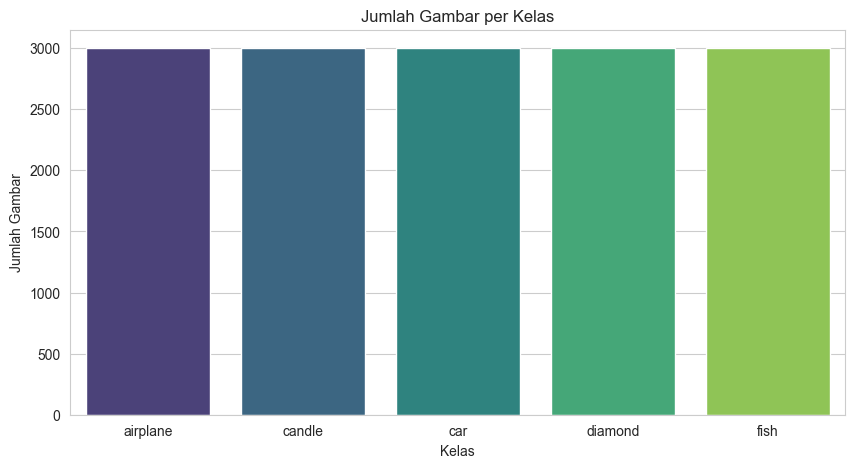

Detail Jumlah: {'airplane': 3000, 'candle': 3000, 'car': 3000, 'diamond': 3000, 'fish': 3000}


In [9]:
# ==========================================
# 1. CEK DISTRIBUSI KELAS (JUMLAH DATA)
# ==========================================
print("=== 1. DISTRIBUSI DATA ===")
class_counts = {}

for cls in CLASSES:
    folder_path = os.path.join(DATA_DIR, cls)
    if os.path.exists(folder_path):
        count = len(os.listdir(folder_path))
        class_counts[cls] = count
    else:
        class_counts[cls] = 0

# Plot Bar Chart
plt.figure(figsize=(10, 5))
sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()), palette="viridis")
plt.title("Jumlah Gambar per Kelas")
plt.ylabel("Jumlah Gambar")
plt.xlabel("Kelas")
plt.show()

print(f"Detail Jumlah: {class_counts}")



=== 2. SAMPEL GAMBAR (VARIASI) ===


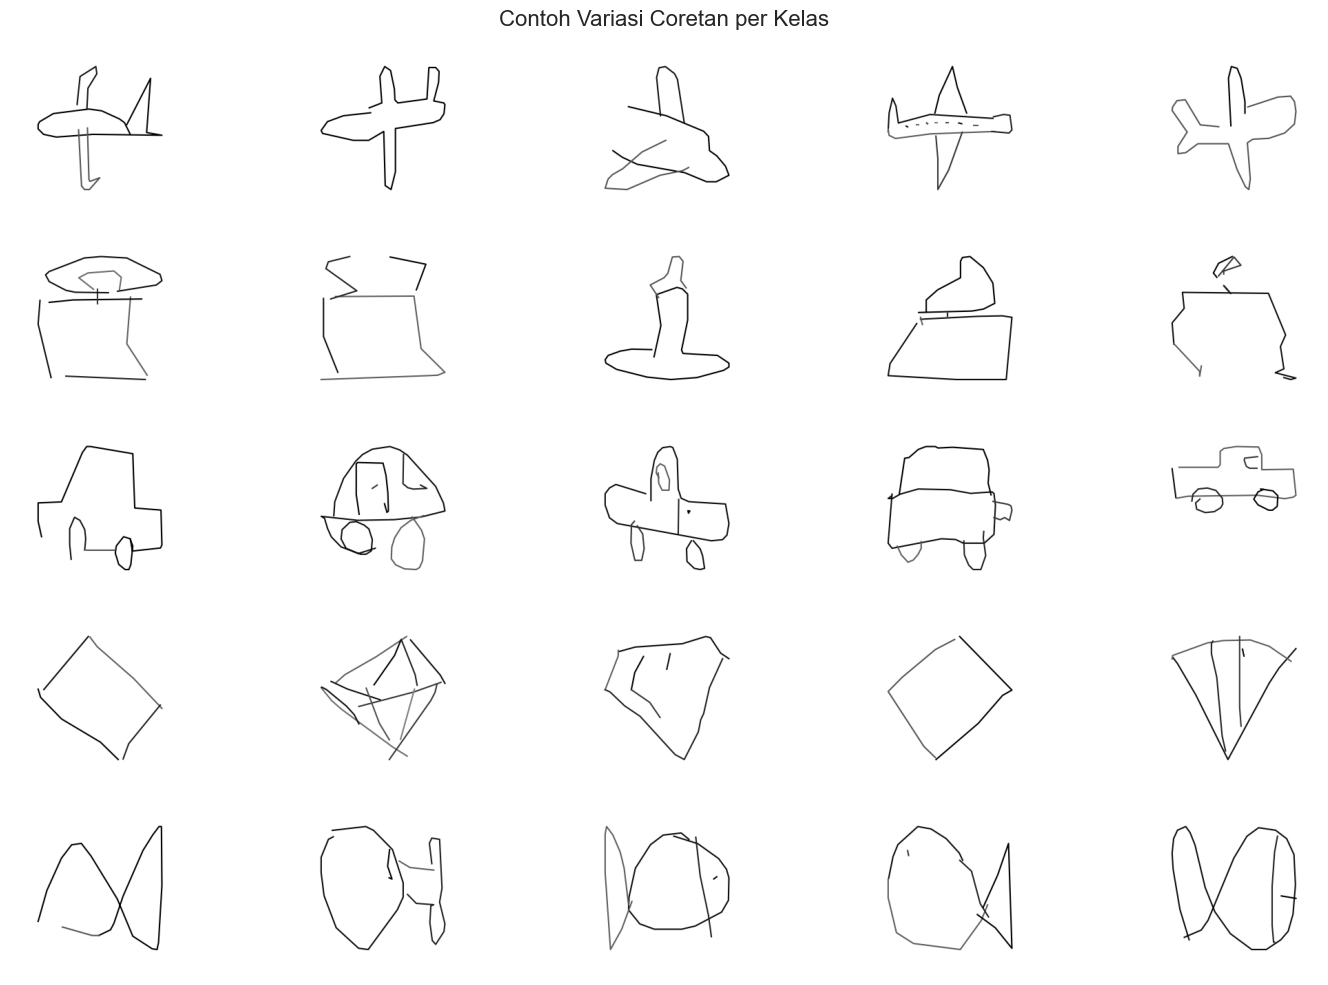

In [10]:
# ==========================================
# 2. VISUALISASI SAMPEL RANDOM (VARIASI)
# ==========================================
print("\n=== 2. SAMPEL GAMBAR (VARIASI) ===")
samples_per_class = 5

plt.figure(figsize=(15, 10))
for i, cls in enumerate(CLASSES):
    folder_path = os.path.join(DATA_DIR, cls)
    all_images = os.listdir(folder_path)
    random_images = random.sample(all_images, samples_per_class)
    
    for j, img_name in enumerate(random_images):
        img_path = os.path.join(folder_path, img_name)
        img = Image.open(img_path)
        
        plt.subplot(len(CLASSES), samples_per_class, i * samples_per_class + j + 1)
        plt.imshow(img, cmap='gray')
        if j == 0:
            plt.ylabel(cls, fontsize=12, fontweight='bold')
        plt.axis('off')

plt.suptitle("Contoh Variasi Coretan per Kelas", fontsize=16)
plt.tight_layout()
plt.show()


=== 3. ANALISIS PIXEL (APA YANG DILIHAT AI?) ===


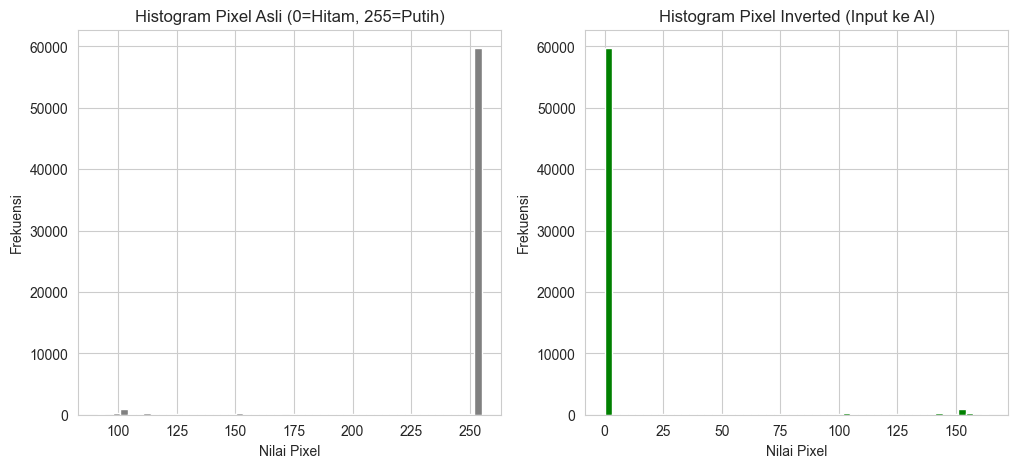

NOTE: Jika grafik kiri menumpuk di 255 (Putih), berarti background asli putih.
Model AI kita butuh background Hitam (0), makanya kita lakukan Invert (grafik kanan).


In [11]:
# ==========================================
# 3. ANALISIS PIXEL & PREPROCESSING CHECK
# ==========================================
print("\n=== 3. ANALISIS PIXEL (APA YANG DILIHAT AI?) ===")
# Kita ambil 1 contoh gambar
sample_cls = CLASSES[0]
sample_img_name = os.listdir(os.path.join(DATA_DIR, sample_cls))[0]
sample_img_path = os.path.join(DATA_DIR, sample_cls, sample_img_name)

img_original = Image.open(sample_img_path).convert('L') # Grayscale
img_inverted = ImageOps.invert(img_original) # Inverted (Yang dipakai AI)

# Plot Histogram Pixel
plt.figure(figsize=(12, 5))

# Gambar Asli
plt.subplot(1, 2, 1)
plt.title("Histogram Pixel Asli (0=Hitam, 255=Putih)")
plt.hist(np.array(img_original).flatten(), bins=50, color='gray')
plt.xlabel("Nilai Pixel")
plt.ylabel("Frekuensi")

# Gambar Inverted
plt.subplot(1, 2, 2)
plt.title("Histogram Pixel Inverted (Input ke AI)")
plt.hist(np.array(img_inverted).flatten(), bins=50, color='green')
plt.xlabel("Nilai Pixel")
plt.ylabel("Frekuensi")

plt.show()

print("NOTE: Jika grafik kiri menumpuk di 255 (Putih), berarti background asli putih.")
print("Model AI kita butuh background Hitam (0), makanya kita lakukan Invert (grafik kanan).")


=== 4. RATA-RATA BENTUK (GHOST IMAGE) ===


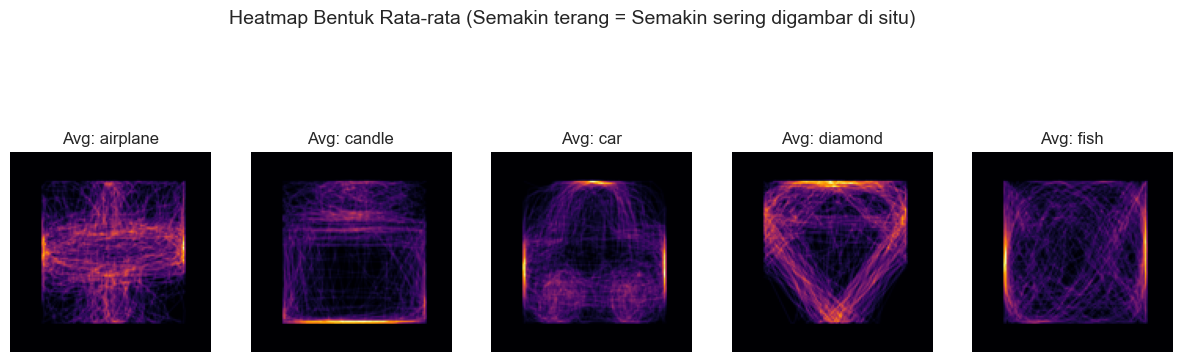

In [12]:
# ==========================================
# 4. RATA-RATA BENTUK (AVERAGE IMAGE)
# ==========================================
print("\n=== 4. RATA-RATA BENTUK (GHOST IMAGE) ===")
# Ini untuk melihat "bentuk umum" dari setiap kelas
plt.figure(figsize=(15, 5))

for i, cls in enumerate(CLASSES):
    folder_path = os.path.join(DATA_DIR, cls)
    images = os.listdir(folder_path)[:100] # Ambil 100 gambar pertama
    
    img_sum = None
    count = 0
    
    for img_name in images:
        try:
            img_path = os.path.join(folder_path, img_name)
            img = Image.open(img_path).convert('L').resize((128, 128))
            img = ImageOps.invert(img) # Kita invert biar objeknya yang dijumlahkan
            img_arr = np.array(img, dtype=np.float32)
            
            if img_sum is None:
                img_sum = img_arr
            else:
                img_sum += img_arr
            count += 1
        except:
            pass
            
    avg_img = img_sum / count
    
    plt.subplot(1, 5, i+1)
    plt.imshow(avg_img, cmap='inferno') # Pakai colormap panas biar kelihatan densitasnya
    plt.title(f"Avg: {cls}")
    plt.axis('off')

plt.suptitle("Heatmap Bentuk Rata-rata (Semakin terang = Semakin sering digambar di situ)", fontsize=14)
plt.show()